### Импорты

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

# 1 Практика по ПЗМС
# Для целочисленных данных необходимо:
## Студенты обеих подгрупп должны собрать данные о росте учащихся всей учебной группы в сантиметрах. Собранные данные рассматривать в вещественных

In [67]:
data ={'random_number': [7, 0, 8, 2, 1, 0, 5, 7], 
       'hight': [1.84, 1.75, 1.80, 1.84, 1.57, 1.85, 1.83, 1.80],
       'month': [1, 11, 12, 9, 1, 12, 8, 12]
      }

In [68]:
df = pd.DataFrame(data=data)
df

,random_number,hight,month
0,7,1.84,1
1,0,1.75,11
2,8,1.80,12
3,2,1.84,9
4,1,1.57,1
5,0,1.85,12
6,5,1.83,8
7,7,1.80,12


In [69]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   random_number  8 non-null      int64  
 1   hight          8 non-null      float64
 2   month          8 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 320.0 bytes


,random_number,hight,month
count,8.000000,8.000000,8.000000
mean,3.750000,1.785000,8.250000
std,3.370036,0.092736,4.713203
min,0.000000,1.570000,1.000000
25%,0.750000,1.787500,6.250000
50%,3.500000,1.815000,10.000000
75%,7.000000,1.840000,12.000000
max,8.000000,1.850000,12.000000


## Построить вариационный ряд с абсолютными и относительными частотами по выборке дискретных данных

In [70]:
random_var_series = df['random_number'].value_counts().sort_index()
random_absolute_frequencies = random_var_series
random_relative_frequencies = random_var_series / len(df)

month_var_series = df['month'].value_counts().sort_index()
month_absolute_frequencies = month_var_series
month_relative_frequencies = month_var_series / len(df)

## Построить полигон относительных частот вариационного ряда

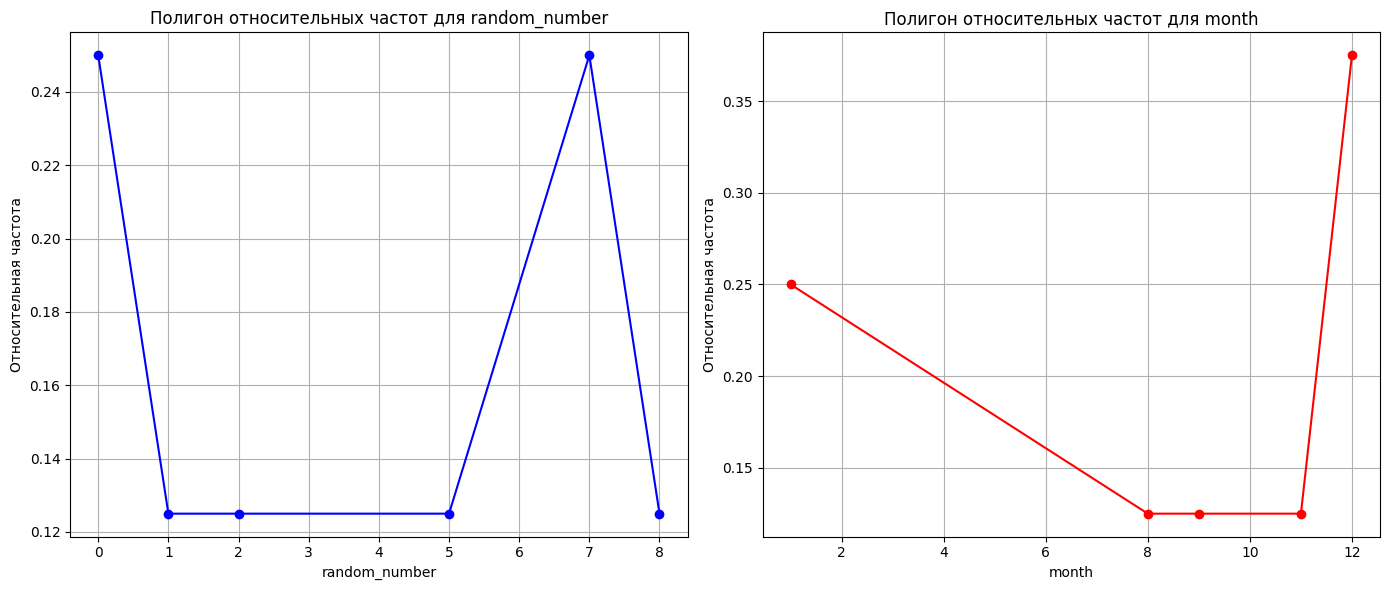

In [71]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(random_relative_frequencies.index, random_relative_frequencies.values, marker='o', linestyle='-', color='b')
axs[0].set_title('Полигон относительных частот для random_number')
axs[0].set_xlabel('random_number')
axs[0].set_ylabel('Относительная частота')
axs[0].grid(True)

axs[1].plot(month_relative_frequencies.index, month_relative_frequencies.values, marker='o', linestyle='-', color='r')
axs[1].set_title('Полигон относительных частот для month')
axs[1].set_xlabel('month')
axs[1].set_ylabel('Относительная частота')
axs[1].grid(True)

plt.tight_layout()
plt.show()

## Выписать выражение для эмпирической функции распределения и построить её график


In [72]:
sorted_data = np.sort(df['random_number'])
n = len(sorted_data)

In [73]:
def empirical_distribution_function(x):
    return np.searchsorted(sorted_data, x, side='right') / n

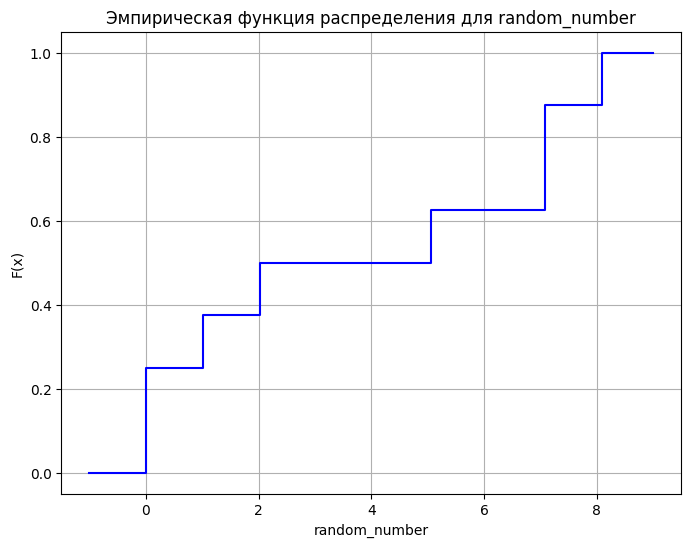

In [74]:
x_values = np.linspace(min(sorted_data) - 1, max(sorted_data) + 1, 100)

plt.figure(figsize=(8, 6))
plt.step(x_values, empirical_distribution_function(x_values), where="post", color='b')

plt.title('Эмпирическая функция распределения для random_number')
plt.xlabel('random_number')
plt.ylabel('F(x)')
plt.grid(True)

plt.show()

## Рассчитать выборочные описательные статистики:
- выборочное среднее
- выборочную дисперсию
- выборочное стандартное отклонение
- выборочную медиану
- коэффициент вариации

In [75]:
random_number = df['random_number']

mean_value = random_number.mean()
variance_value = random_number.var()
std_dev_value = random_number.std()
median_value = random_number.median()
coeff_variation = (std_dev_value / mean_value) * 100

In [76]:
statistics = {
    'Выборочное среднее': mean_value,
    'Выборочная дисперсия': variance_value,
    'Выборочное стандартное отклонение': std_dev_value,
    'Выборочная медиана': median_value,
    'Коэффициент вариации': coeff_variation
}

for stat, value in statistics.items():
    print(f'{stat}: {value:.3f}')

Выборочное среднее: 3.750
Выборочная дисперсия: 11.357
Выборочное стандартное отклонение: 3.370
Выборочная медиана: 3.500
Коэффициент вариации: 89.868


# Для вещественных (непрерывных) данных необходимо:

## Рассчитать число групп (интервалов)  m для квантования исходных данных по правилу Стёрджесса

In [95]:
data

{'random_number': [7, 0, 8, 2, 1, 0, 5, 7],
 'hight': [1.84, 1.75, 1.8, 1.84, 1.57, 1.85, 1.83, 1.8],
 'month': [1, 11, 12, 9, 1, 12, 8, 12]}

In [88]:
n_height = len(data['hight'])
min_val = min(data['hight'])
max_val = max(data['hight'])
m = 1 + 3.332 * np.log10(n_height)
m = int(m)
h = (max_val - min_val ) / m
print(f'Число групп (интервалов): {m}')
print(f'Длина каждого интервала: {h}')

Число групп (интервалов): 4
Длина каждого интервала: 0.07


## Вычислить значения m+1 границ групп для значений выборки по правилу фиксированной величины интервала

In [97]:
intervals = np.arange(min_val, max_val + h, h)
intervals = intervals[:-1]

## Построить вариационный ряд для выборки интервальных данных

In [98]:
frequencies, bin_edges = np.histogram(df['hight'], bins=intervals)

var_series = pd.DataFrame({
    'Интервал': pd.IntervalIndex.from_breaks(intervals),
    'Абсолютная частота': frequencies
})

var_series['Относительная частота'] = var_series['Абсолютная частота'] / n
var_series

,Интервал,Абсолютная частота,Относительная частота
0,"(1.57, 1.6400000000000001]",1,0.125
1,"(1.6400000000000001, 1.7100000000000002]",0,0.000
2,"(1.7100000000000002, 1.7800000000000002]",1,0.125
3,"(1.7800000000000002, 1.8500000000000003]",6,0.750


## Построить гистограмму распределения относительных частот для рассчитанных интервалов выборки

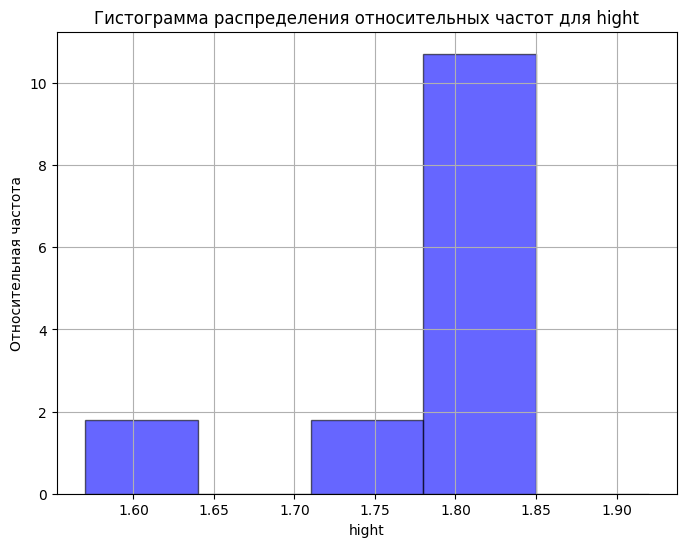

In [91]:
plt.figure(figsize=(8, 6))
plt.hist(df['hight'], bins=intervals, density=True, color='blue', alpha=0.6, edgecolor='black')

plt.title('Гистограмма распределения относительных частот для hight')
plt.xlabel('hight')
plt.ylabel('Относительная частота')
plt.grid(True)

plt.show()

## Выписать выражение для эмпирической функции распределения, построить её график


In [92]:
def empirical_distribution_function(x, data):
    return np.searchsorted(np.sort(data), x, side='right') / len(data)

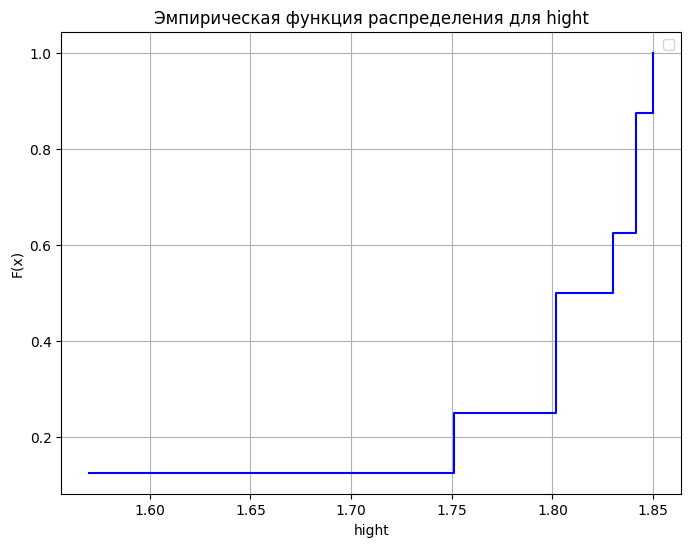

In [93]:
x_values = np.linspace(min(df['hight']), max(df['hight']), 100)

plt.figure(figsize=(8, 6))
plt.step(x_values, empirical_distribution_function(x_values, df['hight']), where="post", color='b')

plt.title('Эмпирическая функция распределения для hight')
plt.xlabel('hight')
plt.ylabel('F(x)')
plt.grid(True)
plt.legend()

plt.show()

In [94]:
mean_value = df['hight'].mean()
variance_value = df['hight'].var()
std_dev_value = df['hight'].std()
coeff_variation = (std_dev_value / mean_value) * 100

statistics = {
    'Выборочное среднее': mean_value,
    'Выборочная дисперсия': variance_value,
    'Выборочное стандартное отклонение': std_dev_value,
    'Выборочная медиана': median_value,
    'Коэффициент вариации': coeff_variation
}

for stat, value in statistics.items():
    print(f'{stat}: {value:.3f}')

Выборочное среднее: 1.785
Выборочная дисперсия: 0.009
Выборочное стандартное отклонение: 0.093
Выборочная медиана: 3.500
Коэффициент вариации: 5.195
